# ML Project 2020 - June 2020

## Submission details: 
- TEAM 35 :
- [Yuval Eppel], [311545669]
- [Yotam Dery], [311551170]
- [Raphael Shuhandler], [311402200]

# Imports

In [3]:
import pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import datetime


start_time = datetime.datetime.now()
#we will use start time to know how long the file was running for


# Reading CSV file

In [4]:
df_train = pd.read_csv("train.csv") #reading the train data
df_test=pd.read_csv("test_without_target.csv",index_col = 0) #reading the test data

train_x = df_train.drop(['label'], axis=1)
train_y = df_train['label']

test_x = df_test


# Part A

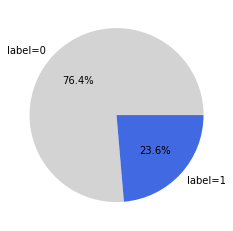

Total rows labeled as 0: 16921
Total rows labeled as 1: 5240


In [5]:
#first, we will plot a pie chart to understand how many 0's 1's is there in the data

zeros_ones = []
zeros_ones.append(train_y[train_y==0].shape[0])
zeros_ones.append(train_y[train_y==1].shape[0])

plt.pie(zeros_ones,autopct='%1.1f%%', labels =[ 'label=0','label=1'], colors = ['lightgrey','royalblue'])
plt.show()

print('Total rows labeled as 0: ' + str(zeros_ones[0]))
print('Total rows labeled as 1: ' + str(zeros_ones[1]))


In [6]:
#setting the following option to get better and cleaner view while the code runs.

pd.set_option('display.max_columns', None)
np.warnings.filterwarnings('ignore')


In [7]:
train_x.head(10) #showing the first 10 rows.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.170981,5.672133,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,0.702957,1024.1,1025.9,0,0.6mm,32.0,13.9,12.2,D,D,28.0,7.0,2011,40.0,15.420787
1,2.595788,23.203289,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,0.223911,1005.3,1008.1,0,0.0mm,50.0,18.6,16.5,N,I,61.0,43.0,2012,110.0,240.496883
2,0.972794,7.127348,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,0.180848,1020.8,1026.5,0,0.0mm,NaN,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,224.282903
3,1.891667,17.881507,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,0.181289,1021.9,1019.8,0,0.8mm,88.0,14.2,11.4,K,D,39.0,24.0,2010,130.0,86.810830
4,1.965881,13.936969,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,0.237347,1005.3,1007.8,0,0.0mm,112.0,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,120.642922
5,2.238301,18.192718,4.8,59.0,56.0,B,a28,1.364286,0.657143,11,0.264140,1017.7,1019.7,0,0.0mm,82.0,17.5,14.9,L,A,37.0,17.0,2012,110.0,402.396080
6,2.509753,20.039362,4.8,87.0,91.0,M,a18,1.514286,1.271429,5,0.479375,1017.3,1021.3,1,4.2mm,9.0,20.3,19.4,F,K,13.0,7.0,2010,40.0,245.518984
7,2.222053,20.316311,5.0,70.0,86.0,E,a12,1.678571,1.500000,12,0.015658,1003.5,1003.5,1,2.6mm,6.0,22.2,21.2,N,E,65.0,20.0,2010,370.0,535.854669
8,1.809370,15.331249,3.6,37.0,68.0,O,a29,1.364286,0.307143,5,0.246409,1018.8,1022.4,0,0.0mm,99.0,18.5,11.3,O,B,43.0,20.0,2011,90.0,13.274009
9,3.445552,41.997306,12.2,36.0,36.0,D,a26,2.364286,1.314286,1,0.280882,1006.3,1006.9,0,0.0mm,132.0,30.1,27.6,K,P,50.0,30.0,2010,90.0,352.879837


In [8]:
train_x.tail(10) #showing the last 10 rows.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
22151,1.972832,15.732368,4.2,32.0,55.0,I,a18,1.607143,0.950000,6,0.209661,1012.5,1014.1,0,0.0mm,95.0,21.9,18.1,I,O,31.0,13.0,2010,20.0,6.789896
22152,2.118902,17.263571,4.6,70.0,88.0,A,a6,1.614286,1.350000,12,0.326071,1017.0,1018.8,0,0.8mm,21.0,21.3,18.9,F,B,30.0,17.0,2011,130.0,152.371731
22153,1.382546,11.789845,2.0,76.0,94.0,I,a23,1.371429,0.921429,11,0.287424,1011.3,1011.0,1,26.0mm,76.0,17.4,14.7,I,K,44.0,24.0,2011,190.0,405.624628
22154,1.229473,10.965397,1.6,65.0,80.0,O,a12,1.100000,0.635714,10,0.382148,1017.5,1016.3,1,5.2mm,21.0,14.3,11.8,L,P,48.0,31.0,2011,300.0,351.117653
22155,2.490226,20.441516,4.8,53.0,67.0,O,a13,1.471429,0.942857,10,0.162087,1020.5,1023.2,1,1.8mm,NaN,19.4,14.0,B,B,31.0,7.0,2010,130.0,233.353919
22156,1.408356,13.767739,2.8,55.0,83.0,K,a23,1.364286,0.685714,4,0.119284,1022.0,1022.0,1,1.8mm,99.0,17.5,13.8,D,I,31.0,15.0,2010,90.0,115.748582
22157,2.259704,15.816408,3.8,37.0,71.0,I,a5,1.507143,0.742857,5,0.248723,1020.3,1023.1,0,0.0mm,90.0,20.4,12.4,N,I,30.0,9.0,2012,240.0,259.280483
22158,2.179382,15.663662,3.4,96.0,95.0,G,a0,0.957143,0.821429,7,0.076460,1016.0,1018.7,1,10.8mm,NaN,13.3,11.9,E,G,46.0,15.0,2012,260.0,392.348764
22159,2.014433,15.594799,3.2,89.0,95.0,N,a17,1.000000,0.700000,5,0.284438,1008.5,1010.5,1,2.6mm,27.0,11.9,12.5,J,J,50.0,17.0,2010,150.0,259.886217
22160,1.823822,16.990636,4.0,59.0,62.0,NaN,a25,1.257143,0.885714,9,0.265140,1033.1,1037.1,0,0.0mm,57.0,16.1,14.5,C,A,NaN,19.0,2010,70.0,83.368091


In [9]:
train_x.dtypes #showing data types for each column

0     float64
1     float64
2     float64
3     float64
4     float64
5      object
6      object
7     float64
8     float64
9       int64
10    float64
11    float64
12    float64
13     object
14     object
15    float64
16    float64
17    float64
18     object
19     object
20    float64
21    float64
22      int64
23    float64
24    float64
dtype: object

In [10]:
numerical_train_x = train_x.select_dtypes(include=['float64', 'int64'])

numerical_train_x.describe().T

#statistical description for numerical columns

,count,mean,std,min,25%,50%,75%,max
0,22161.0,2.185958,0.815080,-0.490607,1.622068,2.167701,2.720341,9.092011
1,22161.0,19.797754,10.763614,2.437300,12.268371,17.833216,25.196446,248.877854
2,22161.0,4.929620,3.572644,0.000000,2.400000,4.200000,6.600000,81.200000
3,22102.0,51.547009,20.184353,1.000000,37.000000,52.000000,65.000000,100.000000
4,22057.0,68.497982,18.231315,3.000000,57.000000,69.000000,82.000000,100.000000
7,22154.0,1.648476,0.480275,0.450000,1.271429,1.607143,2.007143,3.435714
8,22143.0,0.888041,0.461375,-0.492857,0.542857,0.864286,1.242857,2.128571
9,22161.0,6.429358,3.381488,1.000000,3.000000,7.000000,9.000000,12.000000
10,22161.0,0.228284,0.161565,-0.195661,0.136002,0.206457,0.278929,0.954076
11,22055.0,1015.347014,7.011856,984.500000,1010.600000,1015.300000,1020.000000,1038.900000


In [11]:
categorical_train_x = train_x.select_dtypes(include=['object'])

categorical_train_x.describe().T

#statistical description for categorical columns

,count,unique,top,freq
5,20812,16,D,1604
6,22161,31,a6,786
13,22161,3,0,16906
14,22161,315,0.0mm,13816
18,21951,16,D,1659
19,21141,16,E,1861


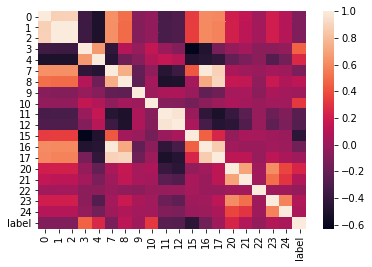

In [12]:
numerical_df = df_train.select_dtypes(include=['float64', 'int64']) #This df also includes the label.
sns.heatmap(numerical_df.corr(),xticklabels=numerical_df.columns,yticklabels=numerical_df.columns)
plt.show()


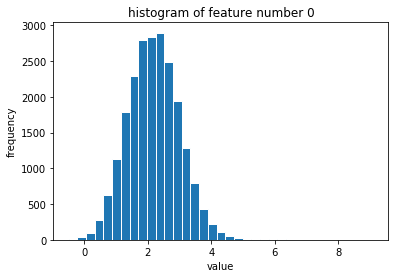

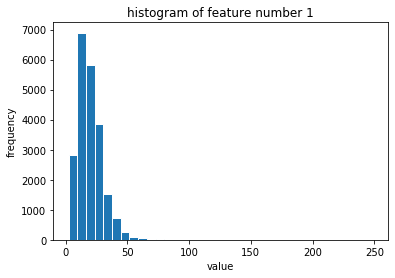

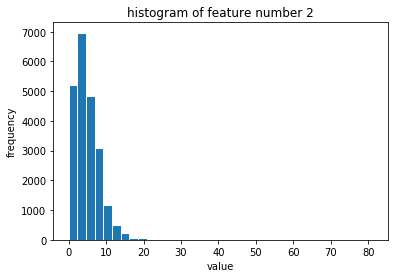

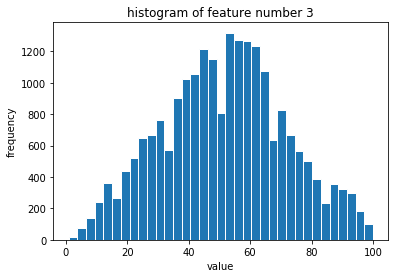

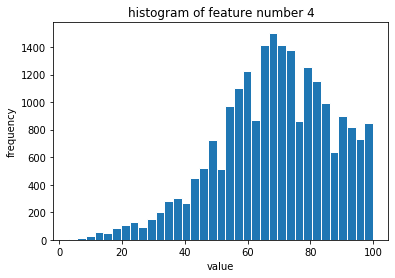

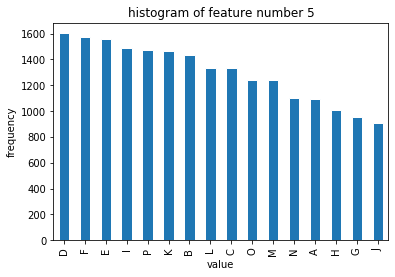

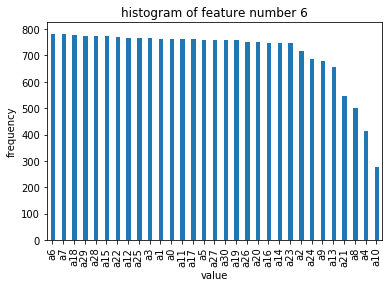

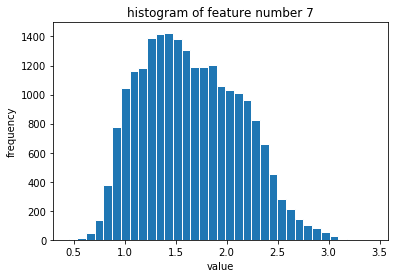

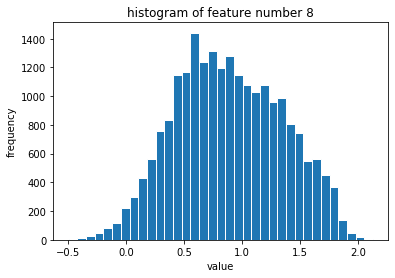

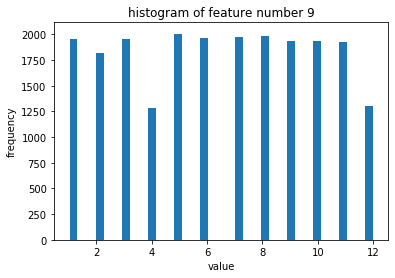

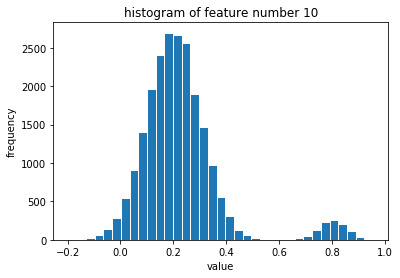

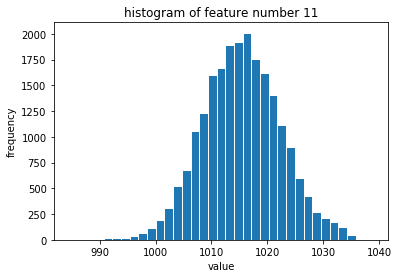

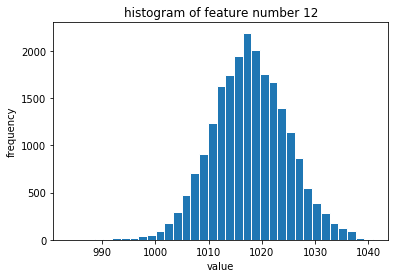

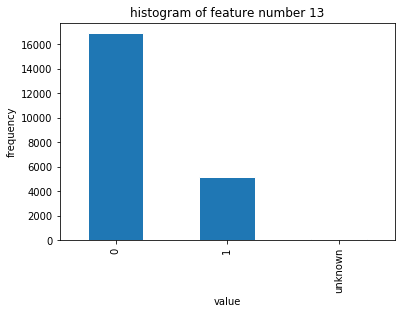

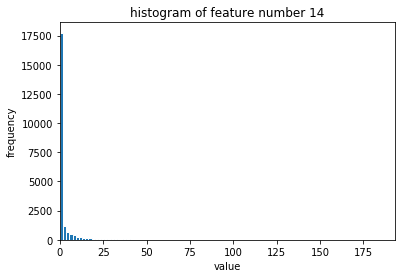

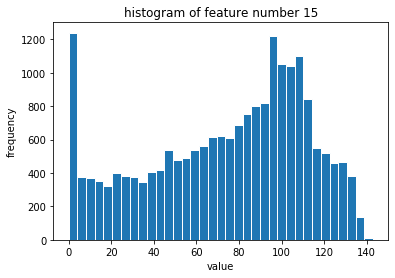

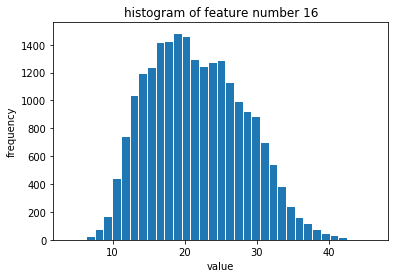

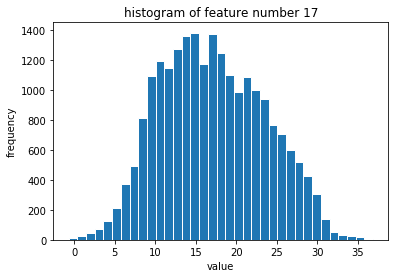

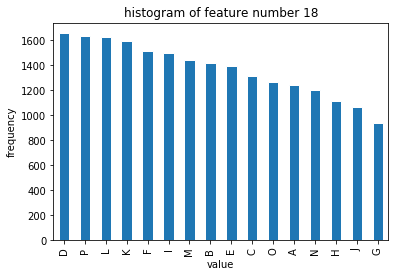

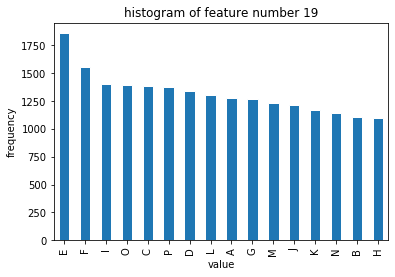

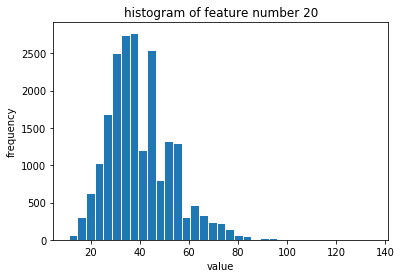

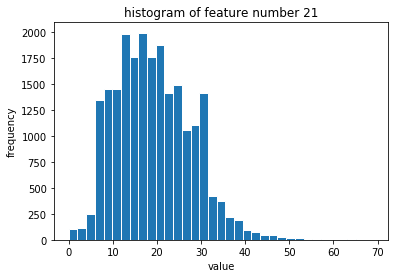

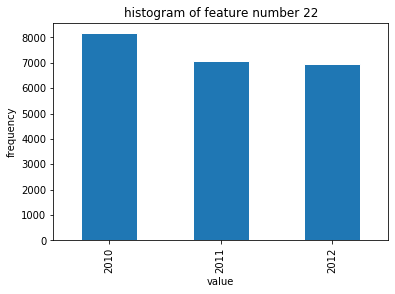

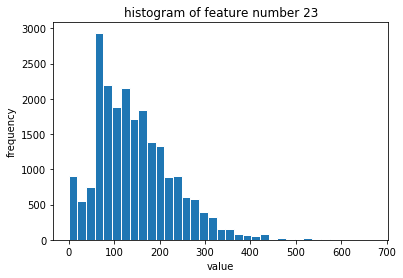

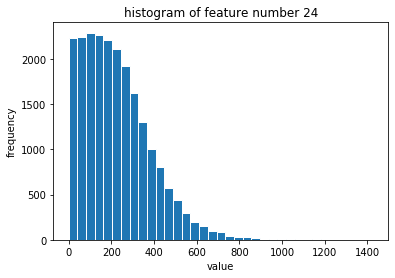

In [13]:
for i in range(train_x.shape[1]):

    if train_x.dtypes[i] == 'float64' or train_x.dtypes[i] == 'int64':
        plt.hist(train_x[str(i)],bins=35, edgecolor='white')
        plt.title('histogram of feature number ' + str(i))
        plt.xlabel('value')
        plt.ylabel('frequency')
        if i == 22:
            train_x[str(i)].value_counts().plot.bar(edgecolor='white')
            plt.title('histogram of feature number ' + str(i))
            plt.xlabel('value')
            plt.ylabel('frequency')

            plt.show()


        plt.show()
        
    if train_x.dtypes[i] == 'object':
        if i == 14:
            temp_series = (train_x[str(i)])
            temp_series = temp_series.str.strip('mm')
            temp_series = temp_series.astype('float')
            plt.hist(temp_series,bins=100, edgecolor='white')
            plt.title('histogram of feature number ' + str(i))
            plt.xlabel('value')
            plt.ylabel('frequency')
            plt.xlim(0, max(temp_series)+10)
            plt.show()
                        

        else:


            #y = train_x[str(i)].value_counts()
            train_x[str(i)].value_counts().plot.bar(edgecolor='white')
            plt.title('histogram of feature number ' + str(i))
            plt.xlabel('value')
            plt.ylabel('frequency')

            plt.show()



# Part B

In [14]:
# Remembering in the train set (without label)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.170981,5.672133,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,0.702957,1024.1,1025.9,0,0.6mm,32.0,13.9,12.2,D,D,28.0,7.0,2011,40.0,15.420787
1,2.595788,23.203289,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,0.223911,1005.3,1008.1,0,0.0mm,50.0,18.6,16.5,N,I,61.0,43.0,2012,110.0,240.496883
2,0.972794,7.127348,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,0.180848,1020.8,1026.5,0,0.0mm,NaN,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,224.282903
3,1.891667,17.881507,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,0.181289,1021.9,1019.8,0,0.8mm,88.0,14.2,11.4,K,D,39.0,24.0,2010,130.0,86.810830
4,1.965881,13.936969,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,0.237347,1005.3,1007.8,0,0.0mm,112.0,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,120.642922


In [15]:
# Removing the initial "mm" from column 14
train_x['14'] = train_x['14'].str.rstrip("mm").astype('float64')
test_x['14'] = test_x['14'].str.rstrip("mm").astype('float64')

#train_x.iloc[: , :15].head()

In [16]:
# Showing the percentage of the missing values for each feature

null_per = train_x.isnull().sum()*100/train_x.shape[0]
null_per.round(2).sort_values(ascending = False)

15    8.44
5     6.09
20    6.07
19    4.60
18    0.95
12    0.51
11    0.48
4     0.47
23    0.45
24    0.45
21    0.45
14    0.37
3     0.27
17    0.23
16    0.13
8     0.08
7     0.03
13    0.00
10    0.00
9     0.00
6     0.00
22    0.00
2     0.00
1     0.00
0     0.00
dtype: float64

**Handeling missing values:**

In [17]:
# Creating a copy of the dataframes
train_x_copy = train_x.copy()
test_x_copy = test_x.copy()

# Defining functions to handle the missing values
def fill_numeric_null(df):
    df.fillna(df.median(),inplace=True)
    return df

def fill_categorial_test_null(df):
    df[['5','6','13','18','19']]=df[['5','6','13','18','19']].fillna(df.mode().iloc[0])
    return df

def drop_null_train(df):
    df.dropna(axis=0, inplace=True)
    return df

# Applying the functions on the data-sets
train_x_only_categorical_nulls = fill_numeric_null(train_x_copy)
mask_categorical_nulls = train_x_only_categorical_nulls.isna().any(axis=1)
mask_categorical_no_nulls = ~mask_categorical_nulls
train_x_without_null = drop_null_train(train_x_only_categorical_nulls)
train_y_without_null = train_y[mask_categorical_no_nulls]


train_x_without_null = train_x_without_null.reset_index(drop=True)
train_y_without_null = train_y_without_null.reset_index(drop=True)

#print(train_x_without_null)
#print(train_y_without_null)

#NOW WE DONT HAVE NULL VALUES IN THE TRAIN SET.
#WE WILL HANDLE NULL VALUES IN TEST SET BY FILLING THEM WITH MEDIAN (FOR NUMERIC), OR MOST COMMON VALUE FOR CATEGORICAL.
#WE MADE SURE THAT WE DON'T REMOVE ANY VALUE FROM THE TEST SET!

test_after_fill_numeric_null=fill_numeric_null(test_x_copy)

test_x_without_null=fill_categorial_test_null(test_after_fill_numeric_null)




In [18]:
# Making sure that we didn't remove values from the test set:
test_x_without_null.shape

(7387, 25)

In [19]:
# Making sure that there's no null values in the test set:
test_x_without_null.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [20]:
# Making sure that there's no null values in the train set (without the lable):
train_x_without_null.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [21]:
# Cheking the number of rows that were removed from the train data:
lines_removed = train_x.shape[0] - train_x_without_null.shape[0]
percentage_removed = math.floor((100*lines_removed/train_x.shape[0]))
print("We removed " + str(lines_removed) + " lines from the train data, which are " + str(percentage_removed) + "% " + "of the original train data")

We removed 2303 lines from the train data, which are 10% of the original train data


In [22]:
# Before handeling the outliers in the data (both train & test data), We'd like to have visibility on the outliers.
# To achive that goal, we'll use Boxplot for each feature.
# Let us first remember where are the categorial features:

train_x_without_null.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5      object
6      object
7     float64
8     float64
9       int64
10    float64
11    float64
12    float64
13     object
14    float64
15    float64
16    float64
17    float64
18     object
19     object
20    float64
21    float64
22      int64
23    float64
24    float64
dtype: object

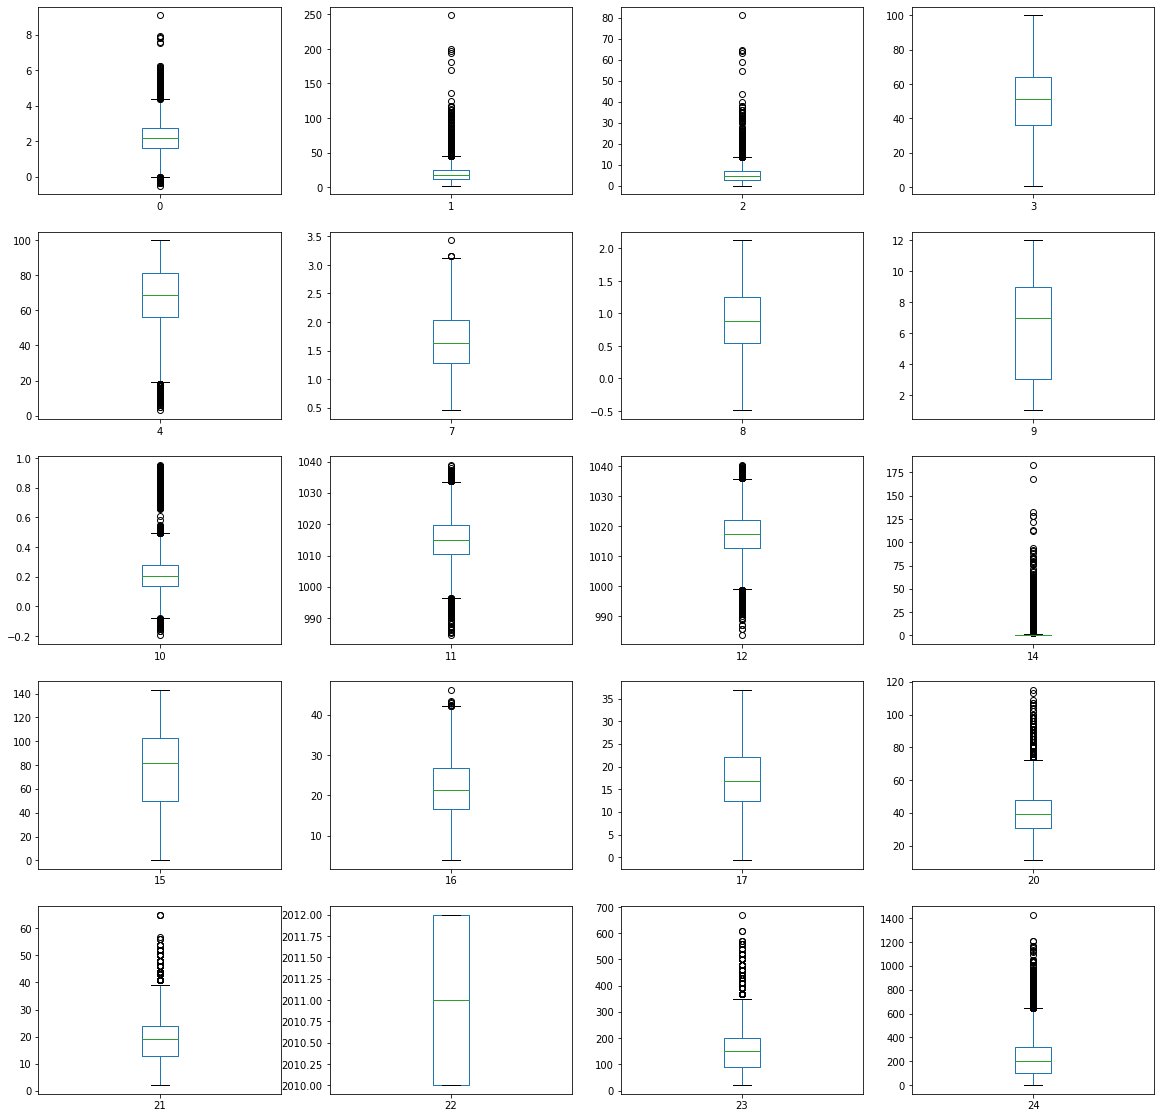

In [23]:
#Plotting the box plot (Only for numeric features) for outliers detection:
train_numeric_columns = train_x_without_null.select_dtypes(exclude=['object'])
test_numeric_columns = test_x_without_null.select_dtypes(exclude=['object'])

f, axes = plt.subplots(5, 4)
n=0
for i in range(5):
    for j in range(4):
        train_numeric_columns.iloc[:,[n]].plot(kind='box',ax=axes[i,j], figsize=(20,20))
        n += 1


plt.show()


In [24]:
train_y_without_null.shape

(19858,)

In [25]:
# Remove outliers only for numeric columns
# Handeling outliers using Z-score method
train_x_no_outliers = train_x_without_null[(np.abs(stats.zscore(train_numeric_columns)) < 3).all(axis=1)]

# Making sure that same rows remain in the lable of the train set:
train_y_no_outliers = train_y_without_null[(np.abs(stats.zscore(train_numeric_columns)) < 3).all(axis=1)]

# Reseting the indexes to have a match between each sample and it's respective lable:
train_x_no_outliers = train_x_no_outliers.reset_index(drop=True)
train_y_no_outliers = train_y_no_outliers.reset_index(drop=True)


In [26]:
train_y_no_outliers.shape

(17847,)


# Data Scaling
###### We will use the Standradization method to scale our data (only the numeric columns). We will apply the scaling both on the train and test sets, using the fit that was made according to the train set. 

In [27]:
def scaling_data(df1,df2):
    model = StandardScaler()
    model.fit(df1)
    transformed_data = model.transform(df2)
    scaled_df = pd.DataFrame(data=transformed_data,columns=df2.columns)
    return scaled_df 

#take only numeric columns
train_numeric_columns = train_x_no_outliers.select_dtypes(exclude=['object'])
test_numeric_columns = test_x_without_null.select_dtypes(exclude=['object'])

# W'd like to scale the numeric values both for train & test sets:
scaled_train = scaling_data(train_numeric_columns,train_numeric_columns)
scaled_test = scaling_data(train_numeric_columns,test_numeric_columns)

# Using One-hot method, W'd like to convert categorial columns into indicator variables:
train_converted_categorial_columns=pd.get_dummies(train_x_no_outliers.select_dtypes(include=['object']))
test_converted_categorial_columns=pd.get_dummies(test_x_without_null.select_dtypes(include=['object']))

test_converted_categorial_columns = test_converted_categorial_columns.drop('6_a25', axis = 1)

#WE REMOVE THIS COLUMN FROM TEST BECAUSE IT DOES NOT EXIST IN TRAIN (WE DO NOT REMOVE ROWS.. WE WANT THE SAME DIMENSIONS)

# Joining all features back together: 
train_x_after_scaling=scaled_train.join(train_converted_categorial_columns)
train_set = train_x_after_scaling.join(train_y_no_outliers)
test_set=scaled_test.join(test_converted_categorial_columns)


## PCA


In [28]:
def PCA_function(X,test_set):
    # Inital fitting in order to check how many components we need
    pca = PCA(X.shape[1])
    pca.fit(X)
    explained_variance = pca.explained_variance_ratio_.cumsum()
    
    # we want to choose components that will explain 95% of the explained variance
    # second fitting for vizualition 
    pca = PCA(.95)
    pca.fit(X)
    x_new = pca.transform(X)
    reduced_test_set=pca.transform(test_set)
    final_components = pca.components_
    return x_new ,reduced_test_set, explained_variance ,final_components

# **All features**

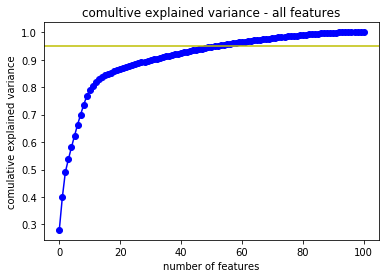

We need 53 components to explain 95% of variance


In [29]:
pca_data ,reduced_test_set,explained_variance, components = PCA_function(train_set.iloc[:,:-1].values,test_set)
plt.plot(explained_variance, 'o-', c='b')
plt.title('comultive explained variance - all features')
plt.xlabel('number of features')
plt.ylabel('comulative explained variance')
plt.axhline(0.95, c='y')
plt.show()
print('We need ' + str((components.shape[0])) + ' components to explain 95% of variance')

In [30]:
# Creating back the train set and test set after using the PCA:
train_after_pca = pd.DataFrame(data=pca_data).join(train_y_no_outliers)
test_after_pca = pd.DataFrame(data=reduced_test_set)
#print(pca_data.shape)
#print(train_y_no_outliers.shape)

### Creating new features

In [31]:
# Function to calculate both train's set and test's set new features
def new_features(df):
    df['53'] = df.apply(lambda row: row[1] * row[5] , axis = 1)
    df['54'] = df.apply(lambda row: row[2] * row[6] , axis = 1)
    df['55'] = df.apply(lambda row: row[3] * row[9] , axis = 1)
    return df

In [32]:
# Activating the calculation function
df_train_w_new_features = new_features(train_after_pca)
df_test_w_new_features = new_features(test_after_pca)

In [33]:
# Re-arrange the train set so the lable column will be positioned last
df_train_w_new_features = df_train_w_new_features.drop('label' , axis = 1)
df_train_w_new_features = df_train_w_new_features.join(train_y_no_outliers)


In [34]:
# Checking on the new computed columns:
df_train_w_new_features.iloc[ : , 53:57].head()

,53,54,55,label
0,-4.877677,2.313822,0.122408,1
1,0.101370,-2.203476,-1.858093,0
2,0.017397,-0.283934,-0.105358,0
3,-0.177610,-1.124223,-0.045024,0
4,0.224651,4.787731,-1.868550,1


# PART C - FITTING THE MODELS:

In [35]:
def KfoldPlot(X, y, clf, k):
    # Getting the specific model, and using KFold on it:
    model = clf
    k_folds = KFold(n_splits=k)
    # Defining & initializing the parameters of the function:
    cum_true_positive_rate = 0.0
    cum_true_positive_rate_train = 0.0
    
    mean_false_positive_rate = np.arange(0,1,0.01)
    range_array = np.linspace(0,1,100)
    splitted = k_folds.split(X)
    #Iterating on each combination of train-validation that we get from the KFold:
    for train_index, validation_index in splitted:
        
        train_X = X.iloc[train_index]
        validation_X = X.iloc[validation_index]
        train_y = y.iloc[train_index]
        validation_y =  y.iloc[validation_index]
        
        # Fitting the model according to the train data
        model.fit(train_X, train_y)
        # Predicting the probabilities for both train & validation sets
        predicted_probability = model.predict_proba(validation_X)[:, 1]
        predicted_probability_train = model.predict_proba(train_X)[:,1]
        
        # Building and plotting the ROC curve
        ROC_values = roc_curve(validation_y, predicted_probability)
        false_positive_rate = ROC_values[0]
        true_positive_rate = ROC_values[1]
        thresholds = ROC_values[2]
        
        ROC_values_train = roc_curve(train_y, predicted_probability_train)
        false_positive_rate_train = ROC_values_train[0]
        true_positive_rate_train = ROC_values_train[1]
        thresholds_train = ROC_values_train[2]
        
        cum_true_positive_rate += np.interp(mean_false_positive_rate, false_positive_rate, true_positive_rate)
        cum_true_positive_rate[0] = 0.0
        
        cum_true_positive_rate_train += np.interp(mean_false_positive_rate, false_positive_rate_train, true_positive_rate_train)
        cum_true_positive_rate_train[0] = 0.0

        
        plt.plot(false_positive_rate, true_positive_rate, color='red')   
    
    mean_true_positive_rate = cum_true_positive_rate/float(k)
    mean_true_positive_rate[-1] = 1.0
    
    mean_true_positive_rate_train = cum_true_positive_rate_train/float(k)
    mean_true_positive_rate_train[-1] = 1.0
    
    auc_result = auc(range_array, mean_true_positive_rate) 
    auc_result_train = auc(range_array, mean_true_positive_rate_train)
        
    plt.plot([0, 1], [0, 1], color='b', linestyle='--', label = 'Random-Guess Line')
    
    plt.plot(mean_false_positive_rate, mean_true_positive_rate, color='k', linestyle='-', label='AUC is '+str(auc_result)[:6])


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(clf)[:str(clf).index('(')] + ' Model')
    plt.legend()
    plt.show()
    
    #print (clf,auc_result,auc_result_train)

    return clf,auc_result,auc_result_train


In [36]:
# Getting the train data without the lable, and only with the lable:
train_x_after_preprocessing = df_train_w_new_features.drop('label' , axis = 1)
train_y_after_preprocessing = df_train_w_new_features['label']

#print(train_x_after_preprocessing)
#print(train_y_after_preprocessing)


In [37]:
# The chosen simple models are:

clf1 = GaussianNB()
clf2 = KNeighborsClassifier()

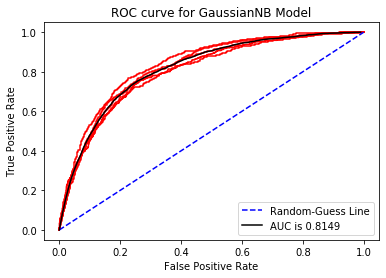

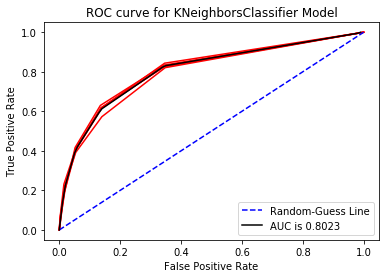

In [38]:
# Getting the results for each model
simple_clfs_lst = [clf1,clf2]
kfold_results = []
for clf in simple_clfs_lst:
    kfold_results.append(KfoldPlot(train_x_after_preprocessing, train_y_after_preprocessing, clf, 5))


In [39]:
# Applying the chosen complex models are:

clf3_parameters_options={'n_estimators':[50,100,150,300], 'max_depth':[1,2,3,4,5,6],'random_state':[0,1]} 
#clf3_parameters_options={'n_estimators':[50], 'max_depth':[1],'random_state':[0,1]} 
print ('1')
clf3_gs=GridSearchCV(RandomForestClassifier(), clf3_parameters_options,cv=3,scoring='roc_auc',n_jobs=-1)
print ('2')
clf3_gs.fit(train_x_after_preprocessing,train_y_after_preprocessing)
print ('3')

clf4_parameters_options={'activation':['relu','logistic','tanh'], 'hidden_layer_sizes':[(100,),(50,50),(20,20,20,10)],'batch_size':[10,50],'learning_rate_init':[0.1,0.01],'max_iter':[1500]}
#clf4_parameters_options={'activation':['tanh'], 'hidden_layer_sizes':[(50,50)],'batch_size':[10],'learning_rate_init':[0.1],'max_iter':[1500]}
print ('4')
clf4_gs=GridSearchCV(MLPClassifier(), clf4_parameters_options,cv=3,scoring='roc_auc',n_jobs=-1)#choosing the best parameters
print ('5')
clf4_gs.fit(train_x_after_preprocessing,train_y_after_preprocessing)
print ('6')

#we use the prints because this commands take a lot of time

clf3 = RandomForestClassifier(**clf3_gs.best_params_)
clf4 = MLPClassifier(**clf4_gs.best_params_,random_state=42)




1
2
3
4
5
6


In [40]:
# Checking on the best parameters of the models:
print (clf3_gs.best_params_)
print (clf4_gs.best_params_)

{'max_depth': 6, 'n_estimators': 300, 'random_state': 0}
{'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1, 'max_iter': 1500}


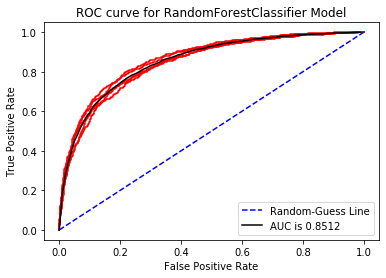

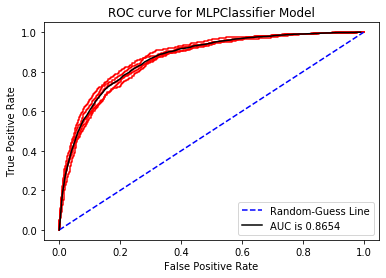

In [41]:
# Activiting each of the complex models
complex_clfs_lst = [clf3,clf4]

for clf in complex_clfs_lst:
    kfold_results.append(KfoldPlot(train_x_after_preprocessing, train_y_after_preprocessing, clf, 5))


# PART D - Models Evaluations

GaussianNB Weighted Accuracy: 0.6139099794454466
KNeighborsClassifier Weighted Accuracy: 0.7838866356216514
RandomForestClassifier Weighted Accuracy: 0.8334168197250514
MLPClassifier Weighted Accuracy: 0.6349405134627426


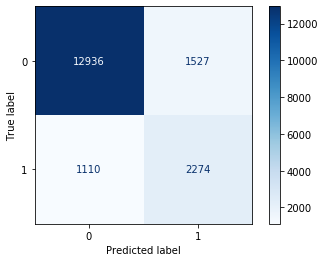

MLPClassifier accuracy: 0.8522440746343923


In [42]:
# A function to calculate the accuracy index as defined in the project's instructions
def calc_weighted_accuracy(clf):
    y_pred = clf.predict(train_x_after_preprocessing)
    y_label = train_y_after_preprocessing
    cm = confusion_matrix(y_label, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return (tn + tp)/(tn+tp+fn+5*fp)


for clf in simple_clfs_lst:
    print (str(clf).partition("(")[0] + ' Weighted Accuracy: ' + str(calc_weighted_accuracy(clf)))
for clf in complex_clfs_lst:
    print (str(clf).partition("(")[0] + ' Weighted Accuracy: ' + str(calc_weighted_accuracy(clf)))

    
# Plotting the confusion matrix of the best model    
plot_confusion_matrix(clf4, train_x_after_preprocessing, train_y_after_preprocessing,cmap=plt.cm.Blues,values_format='d')
plt.show()
print(str(clf4).partition("(")[0] + ' accuracy: ' + str(clf4.score(train_x_after_preprocessing,train_y_after_preprocessing)))

In [43]:
# Checking for overfitting for each model
over_fit_check = pd.DataFrame(columns=['Classifier','train-auc_value', 'validation-auc_value'])


for result in kfold_results:
    temporary_pd = pd.DataFrame([[str(result[0]).split('(')[0], result[2], result[1]]],columns=['Classifier','train-auc_value', 'validation-auc_value'])
    over_fit_check=over_fit_check.append(temporary_pd,ignore_index=True)
    


over_fit_check['difference'] = over_fit_check['train-auc_value'] - over_fit_check['validation-auc_value']
over_fit_check['overfit'] = over_fit_check['difference']>0.1

over_fit_check

,Classifier,train-auc_value,validation-auc_value,difference,overfit
0,GaussianNB,0.818028,0.814921,0.003106,False
1,KNeighborsClassifier,0.933354,0.802360,0.130995,True
2,RandomForestClassifier,0.886870,0.851268,0.035602,False
3,MLPClassifier,0.884544,0.865481,0.019063,False


In [44]:
# Preparing the results and export them as a csv file
clf = clf4
clf.fit(train_x_after_preprocessing, train_y_after_preprocessing)
our_prediction = pd.DataFrame(clf.predict_proba(df_test_w_new_features))
our_prediction = pd.DataFrame(our_prediction[1])
our_prediction = our_prediction.rename(columns = {1 : "pred_proba"})
print (our_prediction)
our_prediction.to_csv('Submission_group_35.csv')
#clf = LR_clf.fit(fs_data.values,Y_final)

      pred_proba
0       0.051690
1       0.226354
2       0.046009
3       0.020161
4       0.005747
...          ...
7382    0.005753
7383    0.249429
7384    0.006482
7385    0.021063
7386    0.051750

[7387 rows x 1 columns]


In [45]:
# Checking the final time of the program
end_time = datetime.datetime.now()
print('Total running time: '+ str(end_time - start_time))

Total running time: 0:16:17.267192
